**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*
*, completed by Junru Lu*

In [1]:
from __future__ import print_function, division
import pylab as pl

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

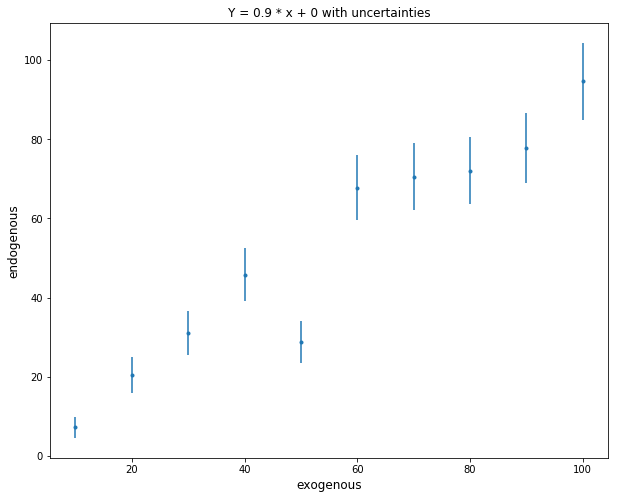

In [3]:
slope = 0.9
intercept = 0
x = np.linspace(10, 100, 10)
y = line(slope, x, b=intercept, errors=errors)
plt.figure(figsize=(10, 8))
plt.errorbar(x, y, yerr=[errors(yy) for yy in y], linestyle="None", fmt='.')
plt.title("Y = %s * x + %s with uncertainties"%(slope, intercept))
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [4]:
print(y)

[  7.17071718  20.48954299  31.07759731  45.81593659  28.824411
  67.78732671  70.58064772  72.06984005  77.77897716  94.67383043]


In [5]:
print(x)

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


In [6]:
sm.add_constant(x)

array([[   1.,   10.],
       [   1.,   20.],
       [   1.,   30.],
       [   1.,   40.],
       [   1.,   50.],
       [   1.,   60.],
       [   1.,   70.],
       [   1.,   80.],
       [   1.,   90.],
       [   1.,  100.]])

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [7]:
#THE WRONG WAY
smfit_wrong = smf.OLS(y, x).fit()
smfit_wrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/scipy/stats/stats.py:1326: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     485.5
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.86e-09
Time:                        22:06:31   Log-Likelihood:                -34.837
No. Observations:                  10   AIC:                             71.67
Df Residuals:                       9   BIC:                             71.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9332      0.042     22.035      0.000         0.837     1.029
==============================================================================
Omnibus:                        3.808   Durbin-Watson:                   2.884
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                1.235
Skew:                          -0.832   Prob(JB):                        0.539
Kurtosis:                       3.446   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#THE RIGHT WAY
smfit_right = smf.OLS(y, sm.add_constant(x)).fit()
smfit_right.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     89.16
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.30e-05
Time:                        22:06:31   Log-Likelihood:                -34.803
No. Observations:                  10   AIC:                             73.61
Df Residuals:                       8   BIC:                             74.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4011      6.001      0.233      0.821       -12.436    15.239
x1             0.9132      0.097      9.443      0.000         0.690     1.136
==============================================================================
Omnibus:                        4.080   Durbin-Watson:                   2.906
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                1.309
Skew:                          -0.845   Prob(JB):                        0.520
Kurtosis:                       3.534   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Difference: The R-suqared dropped from the wrong way to the right way. The right way fit an intercept to help fit the line, which means part of Y was explained by the intercept other than X.

# 4. plot the data (as points) and both statsmodels fits

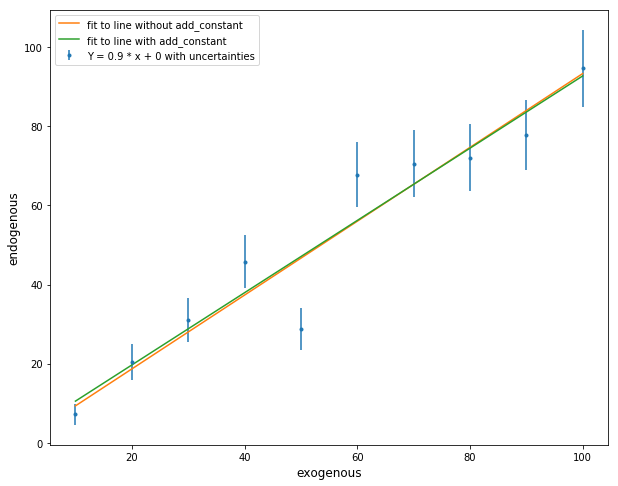

In [9]:
plt.figure(figsize=(10, 8))
plt.errorbar(x, y, yerr=[errors(yy) for yy in y], linestyle="None", fmt='.', 
             label="Y = %s * x + %s with uncertainties"%(slope, intercept))
plt.plot(x, smfit_wrong.predict(x), label="fit to line without add_constant")
plt.plot(x, smfit_right.predict(sm.add_constant(x)), label="fit to line with add_constant")
plt.legend(loc="upper left")
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

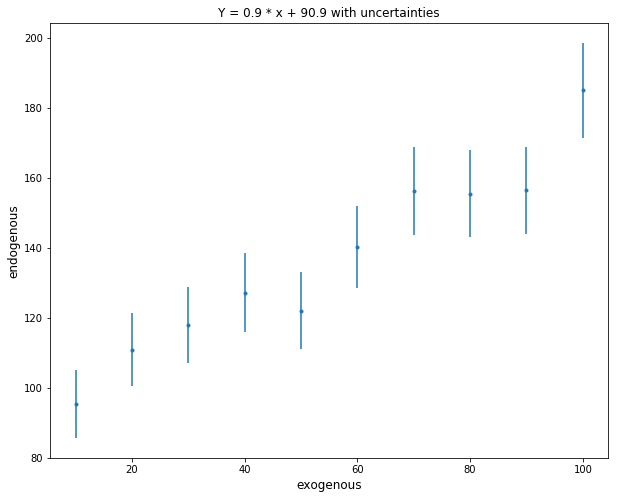

In [10]:
intercept = 101 * slope
x = np.linspace(10, 100, 10)
y = line(slope, x, b=intercept, errors=errors)
plt.figure(figsize=(10, 8))
plt.errorbar(x, y, yerr=[errors(yy) for yy in y], linestyle="None", fmt='.')
plt.title("Y = %s * x + %s with uncertainties"%(slope, intercept))
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)

# 6. repeat step 3

In [11]:
#THE WRONG WAY
smfit_wrong = smf.OLS(y, x).fit()
smfit_wrong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     90.14
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.50e-06
Time:                        22:06:32   Log-Likelihood:                -51.546
No. Observations:                  10   AIC:                             105.1
Df Residuals:                       9   BIC:                             105.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.1378      0.225      9.494      0.000         1.628     2.647
==============================================================================
Omnibus:                        1.421   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.720
Skew:                           0.031   Prob(JB):                        0.698
Kurtosis:                       1.687   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#THE RIGHT WAY
smfit_right = smf.OLS(y, sm.add_constant(x)).fit()
smfit_right.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     120.1
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           4.26e-06
Time:                        22:06:33   Log-Likelihood:                -32.704
No. Observations:                  10   AIC:                             69.41
Df Residuals:                       8   BIC:                             70.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         89.4938      4.864     18.398      0.000        78.276   100.711
x1             0.8593      0.078     10.961      0.000         0.679     1.040
==============================================================================
Omnibus:                        0.543   Durbin-Watson:                   2.305
Prob(Omnibus):                  0.762   Jarque-Bera (JB):                0.556
Skew:                          -0.363   Prob(JB):                        0.757
Kurtosis:                       2.102   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Difference: The R-suqared raised from the wrong way to the right way. The right way fit an appropriate intercept to help fit the line.

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [13]:
smfit_right = smf.WLS(y, sm.add_constant(x), weights=[1/(yy + 1e-10) for yy in 
                                                      (y - smfit_right.predict(sm.add_constant(x))) ** 2]).fit()
smfit_right.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            WLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     387.8
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           4.60e-08
Time:                        22:06:34   Log-Likelihood:                -27.902
No. Observations:                  10   AIC:                             59.80
Df Residuals:                       8   BIC:                             60.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         90.4187      2.436     37.114      0.000        84.801    96.037
x1             0.8338      0.042     19.694      0.000         0.736     0.931
==============================================================================
Omnibus:                        5.804   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                1.304
Skew:                          -0.182   Prob(JB):                        0.521
Kurtosis:                       1.269   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The WLS fit much better than OLS

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

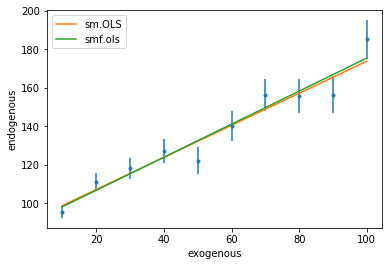

In [14]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit_right.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();